Title: A simple guide to calculate the Hoek-Brown Failure Criteria in Python
Date: 2017-10-20 21:00
Modified: 2017-10-20 21:00
Category: Rock Mechanics
Tags: rock-mechanics, geology
Slug: hoek-brown
Authors: Bruno Ruas de Pinho
Email: brunorpinho10@gmail.com
Summary: Rock masses usually reduces the strength of the intact rock due to the presence of discontinuities. Engineers and geologists must take this effect into account to predict failure in slope faces and tunnel excavations. In this post, I will take you through the process of calculating the Hoek-Brown Failure Criteria in Python.

Rock slopes aren't formed only by one huge block of intact rock. They're usually found in blocks separated by the sets of joint that are part of it. These joints changes the behavior of how the rock responds to stresses. That's why Hoek came up with the knowledge of brittle failure and Brown with the knowledge of the jointed rock mass behavior and, together, they identified a empirical relation of rock mass field descriptions (Rock Mass Rating) with a failure criteria for rock masses. Their research, along with the research of other authors (Palmstrom, Bieniawski, Barton, etc), is brilliant! By applying the equations derived by their results geoscientists can estimate under which stresses will a rock mass enter the failure state with only scrupulous field observations, accurate measurements and an attentive reading of their articles.

[In 2002, Hoek, Carranza-Torres and Corkum updated the](https://rocscience.com/documents/hoek/references/H2002.pdf) relationship to a more modern approach of geological
observations of rock masses called [GSI, also introduced by Hoek, which stands for Geological Strength Index](https://rocscience.com/documents/hoek/references/Quantification-GSI-Chart-Hoek-Carter-Diederichs.pdf).

![rock-masses](./images/9/1.jpg)

In this post, I will go through the process of calculating the Hoek-Brown Failure Criteria using Python.

# Tutorial

The flowchart, extracted from the [GSI article of 2013](https://rocscience.com/documents/hoek/references/Quantification-GSI-Chart-Hoek-Carter-Diederichs.pdf), shows the process of calculating the Hoek-Brown Failure Criteria from the beginning.

![gsi-flowchart](/images/9/2.png)

## Geological Strength Index (GSI)

For this part, read [this article](https://rocscience.com/documents/hoek/references/Quantification-GSI-Chart-Hoek-Carter-Diederichs.pdf) **carefully**, step into the field and take observations and measurements of the surface quality and the rock blocks interlocking of the slope face. 

### GSI by Quantitative Input

There are some parameters that need to be measured in the field. Which are:

$J_a$ and $J_r$ OR $Jcond_{89}$ - and $J_v$

Where:

* $J_a$ (Joint Alteration Number) - Table 3 in the [GSI article](https://rocscience.com/documents/hoek/references/Quantification-GSI-Chart-Hoek-Carter-Diederichs.pdf#page=9)
* $J_r$ (Joint Roughness Number) - Table 3 in the [GSI article](https://rocscience.com/documents/hoek/references/Quantification-GSI-Chart-Hoek-Carter-Diederichs.pdf#page=9)
* $Jcond_{89}$ expresses the Conditions of discontinuities - Table 1 in the [GSI article](https://rocscience.com/documents/hoek/references/Quantification-GSI-Chart-Hoek-Carter-Diederichs.pdf#page=9)
* $J_v$ (Volumetric Joint Count). This is function of the spacing between discontinuities in the rock mass [(from Palmstrom)](http://www.rockmass.net/ap/77_Palmstrom_on_Block_size_and_RQD.pdf).


$$J_v=\frac{1}{S_{1}}+\frac{1}{S_{2}}+\dots+\frac{1}{S_{n}}$$

*Where each $S$ is the spacing between each set of discontinuity.*

The following formulas can be used to [calculate the GSI](https://rocscience.com/documents/hoek/references/Quantification-GSI-Chart-Hoek-Carter-Diederichs.pdf#page=4):

$$GSI = \frac{52 \times \frac{J_r}{J_a}}{1 + \frac{J_r}{J_a}} + \frac{RQD}{2}$$ or
$$GSI = 1.5 \times Jcond_{89} + \frac{RQD}{2}$$

>Where:
>$$RQD = 110 - 2.5 \times J_v$$

### GSI by Descriptive Input

One can also estimate the GSI value by a descriptive input in the GSI chart. The input is a function of the surface quality and the rock blocks interlocking features.

![gsi-chart](./images/9/3.png)

## Other Hoek-Brown Parameters

According to the [Hoek-Brown failure criterion – 2002 Edition](https://rocscience.com/documents/hoek/references/H2002.pdf). The other input parameters to calculate the Hoek-Brown are:

* Uniaxial compressive strength ($\sigma_{ci}$)

> If no lab data (or Schimdt Hammer) is available, $\sigma_{ci}$ can be approximated in the field using a geological hammer, a pocket knife, human strength and the table below (from [ISRM' Suggested Methods for the Quantitative Description of Discontinuities in Rock Masses](http://isrm.net/fotos/gca/1158224359isrm_sm_quantitative_description_of_discontinuities_-_1978.pdf)):

> ![rock-strength](./images/9/4.png)

* Material constant based on the lithology classification ($m_i$). From the Table below:

![m_i](./images/9/5.png)

* Disturbance Factor ($D$). From the Table below:

![D-factor](./images/9/6.png)


## Generalized Hoek-Brown Criterion

>Detailed information on the Hoek-Brown Criterion can be found in the [article](https://rocscience.com/documents/hoek/references/H2002.pdf).

The Generalized Hoek-Brown Criteria is given by:
    
$$\sigma_1^{'}=\sigma_3^{'} + \sigma_{ci} \times (m_b \times \frac{\sigma_3^{}}{\sigma_{ci}} + s)^a$$

>Where:
>$$m_b = m_i \times \exp{(\frac{GSI-100}{28-14 \times D})}$$


>$$s = \exp{(\frac{GSI-100}{9-3 \times D})}$$


>$$a=\frac{1}{2}+\frac{1}{6}\times(e^{-GSI/15} - e^{-20/3})$$


Normal and shear stresses are related to principal stresses by the equations.

$$\sigma_n^{'}=\frac{\sigma_1^{'}+\sigma_3^{'}}{2}              -\frac{\sigma_1^{'}-\sigma_3^{'}}{2} \times              \frac{d\sigma_1^{'}/d\sigma_3^{'} - 1}{d\sigma_1^{'}/d\sigma_3^{'}+1}$$

$$\tau^{'} = (\sigma_1^{'} - \sigma_3^{'})              \frac{\sqrt{d\sigma_1^{'}/d\sigma_3^{'}}}{d\sigma_1^{'}/d\sigma_3^{'} + 1}$$
>Where:
>$$\frac{d\sigma_1^{'}}{d\sigma_3^{'}} =              1 + am_b(m_b \times \frac{\sigma_3^{'}}{\sigma_{ci}}+s)^{a-1}$$


The Hoek-Brown Failure Criteria is related to the Mohr-Coulomb Failure Criteria by fitting a straight line on an range given by the following limits:

$$\sigma_{t} < \sigma_{3}^{'} < \sigma_{3max}$$

    Upper limit

$$\sigma_{3max} = \sigma_{cm} \times 0.72 \times              (\frac{\sigma_{cm}}{\gamma \times H})^{-0.91}$$

> Where:

>$$\sigma_{cm} = \sigma_{ci} \times              \frac{(m_b + 4s - a(m_b - 8s)) \times              (m_b/4+s)^{a-1}}{2(1+a)(2+a)}$$

> $\gamma$ = Unit Weigh of the rock material

> $H$ = Slope Height


    Lower limit

$$\sigma_{t} = s \times \frac{\sigma_{ci}}{m_b}$$

## Hoek-Brown Criteria using simple Python calculations

Let's start with an **example of a rock material description**:

> Aphanitic extrusive rock with intermediate composition. Weathered with a thin alteration coating. Required one firm blow of a geological hammer to fracture a specimen.

> Unit Weigth = 0.0279 MN/m³ (you can find this information in textbooks or [here]())

And an **example rock mass description** for the same slope:

> Rock slope in a open pit mining area with high disturbance. 

> The rock mass is blocky. Three sets of joints identified. Two are slikensided and planar, one is irregular and undulating. Spacings for the three joint sets are approximately 250 mm, 350 mm and 600 mm.

> Depth of the Slope = 30 m

### Calculating GSI

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-dark')

Using the rock material description and a quick lookup at [Table 3](https://rocscience.com/documents/hoek/references/Quantification-GSI-Chart-Hoek-Carter-Diederichs.pdf#page=9) we have that:

In [22]:
Ja = 3.0
Jr = 1.0

From the rock mass description, use the spacing in meters to calculate the $J_v$:

In [23]:
Jv = (1/.25)+(1/.35)+(1/.60)
Jv

8.523809523809524

$$J_v=\frac{1}{0.25}+\frac{1}{0.35}+\frac{1}{0.60}=8.52$$

In [24]:
RQD = 110 - 2.5 * Jv
RQD

88.69047619047619

$$RQD = 110 - 2.5 \times J_v$$
$$RQD = 110 - 2.5 \times 8.52 = 73.70$$


In [25]:
GSI = ((52 * (Jr/Ja)) / (1 + (Jr/Ja))) + (RQD / 2)
GSI

57.345238095238095

$$GSI = \frac{52 \times \frac{J_r}{J_a}}{1 + \frac{J_r}{J_a}} + \frac{RQD}{2}$$
$$GSI = \frac{52 \times \frac{1.00}{3.00}}{1 + \frac{1.00}{3.00}} + \frac{88.69}{2} = 57.34$$

Alright, this value can be validated using the GSI chart.

### Hoek-Brown envelope

Let's use the worst case scenario for Uniaxial compressive resistence ($\sigma_{ci}$) and the material constant ($m_i$). 

It fractured with one firm blow so we can put it in R3 - **Uniaxial compressive strength** is **25 MPa**.

Also, the material constant for **andesite** is **20**.

The disturbance factor is **1.0** for open pit mining with high blasting.

In [79]:
sigci = 25.0
mi = 20.0
D = 1.0

unit_weigth = 0.0279
depth = 25

Calculate the Hoek-Brown parameters $m_b$, $s$ and $a$:

In [80]:
mb = mi * np.exp((GSI-100)/(28-(14*D)))
s = np.exp((GSI-100)/(9-(3*D)))
a = (1/2)+(1/6)*(np.exp(-GSI/15)-np.exp(-20/3))

Let's define a function to create a `DataFrame` with Hoek-Brown calculations using a range of $\sigma_3$ values. This function will accept the lower limit, the upper limit and the number of values to be evaluated.

For each values of the range, it will calculate $\sigma_1$ and the normal and shear stresses ($\sigma_n$ and $\tau$) based on the Hoek-Brown formulas.

In [81]:
def hoek_brown(min_sig3, max_sig3, num_values):
    sig3 = np.linspace(min_sig3, max_sig3, num_values, endpoint=True)
    sig1 = sig3 + sigci * ((mb * (sig3/sigci))+s)**a
    sig_array = pd.DataFrame(data=np.vstack([sig3, sig1]).T, columns=['sig3', 'sig1'])

    sig_array['ds1ds3'] = 1+a*mb*(mb*(sig3/sigci)+s)**(a-1)
    sig_array['sign'] = ((sig1 + sig3)/2) - ((sig1 - sig3)/2) * (sig_array['ds1ds3'] - 1) / (sig_array['ds1ds3'] + 1)
    sig_array['tau'] = (sig1-sig3)*np.sqrt(sig_array['ds1ds3'])/(sig_array['ds1ds3']+1)
    
    return sig_array

Let's see how it goes using 15 values from 0 to 1.

In [94]:
sig_array = hoek_brown(0, 1, 15)
sig_array.dropna(inplace=True)
sig_array

sig3      sig1     ds1ds3      sign       tau
0   0.000000  0.697619  17.327068  0.038065  0.158448
1   0.071429  1.528809   8.894326  0.218723  0.439282
2   0.142857  2.084779   6.947792  0.387192  0.644034
3   0.214286  2.543072   5.972025  0.548304  0.816266
4   0.285714  2.946340   5.359814  0.704064  0.968533
5   0.357143  3.313032   4.929947  0.855611  1.106773
6   0.428571  3.653132   4.606777  1.003690  1.234400
7   0.500000  3.972768   4.352379  1.148827  1.353606
8   0.571429  4.276022   4.145364  1.291415  1.465905
9   0.642857  4.565776   3.972633  1.431759  1.572397
10  0.714286  4.844152   3.825653  1.570101  1.673912
11  0.785714  5.112771   3.698600  1.706639  1.771099
12  0.857143  5.372899   3.587339  1.841538  1.864472
13  0.928571  5.625551   3.488846  1.974938  1.954451
14  1.000000  5.871555   3.400851  2.106958  2.041384

Use `matplotlib` to check the envelope.

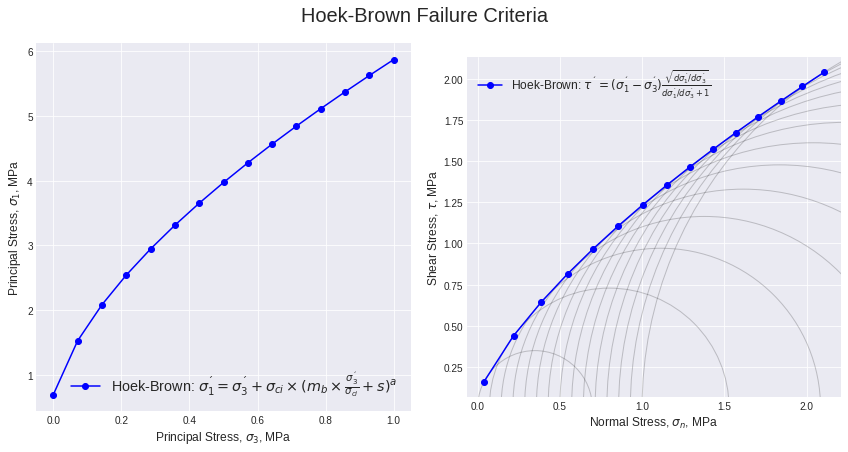

In [108]:
# Plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121)

sig1_formula = r'\sigma_1^{´}=\sigma_3^{´} + \sigma_{ci} \
            \times (m_b \times \frac{\sigma_3^{´}}{\sigma_{ci}} + s)^a'


ax.plot(sig_array.sig3.values, sig_array.sig1.values, 'bo-',
        label='Hoek-Brown: ' + sig1_formula.join(r'$$')); 
ax.set_xlabel(u'Principal Stress, $\sigma_3$, MPa', fontsize=12)
ax.set_ylabel(u'Principal Stress, $\sigma_1$, MPa', fontsize=12)

ax.grid(); ax.legend(fontsize='x-large')

ax = fig.add_subplot(122)

tau_formula = r'\tau^{´} = (\sigma_1^{´} - \sigma_3^{´}) \
             \frac{\sqrt{d\sigma_1^{´}/d\sigma_3^{´}}}{d\sigma_1^{´}/d\sigma_3^{´} + 1}'

ax.plot(sig_array['sign'], sig_array['tau'], 'bo-',
    label='Hoek-Brown: ' + tau_formula.join(r'$$'))
ax.set_xlabel(u'Normal Stress, $\sigma_n$, MPa', fontsize=12)
ax.set_ylabel(u'Shear Stress, $\u03C4$, MPa', fontsize=12)

# Add Mohr circles for the invervals that were defined above.

centers = ((sig_array.sig1.values - sig_array.sig3.values) / 2) + sig_array.sig3.values
radius = sig_array.sig1.values - centers

for r, c in zip(radius, centers):
    ax.add_patch(plt.Circle([c, 0], r, facecolor='none', ec='k', alpha=.2))

ax.grid()
ax.set_aspect('equal')
ax.legend(fontsize='large')

fig.suptitle('Hoek-Brown Failure Criteria', fontsize=20, y=1.05)
fig.tight_layout(pad=1.5)
fig.savefig('./images/9/7.png', dpi=200)

<img src="./images/9/7.png" width="800">

### Fitting the Mohr-Coulomb Failure Criteria using Linear Regression

Detailed information can be found in [Hoek-Brown failure criterion – 2002 Edition](https://www.rocscience.com/documents/hoek/references/H2002.pdf#page=4).

For example:

> Since most geotechnical software is still written in
terms of the Mohr-Coulomb failure criterion, it is
necessary to determine equivalent angles of friction ($\phi$)
and cohesive strengths ($c$) for each rock mass and stress
range.

The first step is to find the range in $\sigma_3$ where there is a relationship between the Mohr-Coulomb and Hoek-Brown Criteria.

$$\sigma_{t} < \sigma_{3}^{'} < \sigma_{3max}$$

Minimum value:

In [ ]:
sigcm = sigci * (mb+4*s-a*(mb-8*s))*(((mb/4)+s)**(a-1))/(2*(1+a)*(2+a))

sigt = -s*sigci/mb

Maximum value:

In [87]:
sig3_max = sigcm * 0.72 * (sigcm / (unit_weigth * depth))**(-.91)

Calculate the `DataFrame` with the new range (drop `NaNs`):

In [89]:
sig_array_relat = hoek_brown(sigt, sig3_max, 25)
sig_array_relat.dropna(inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  


Let's use `sklearn` to fit a linear function in this interval to find the Mohr-Coulomb Failure Criteria:

In [98]:
from sklearn.linear_model import LinearRegression

# Define a LinearRegression model

lr = LinearRegression()

# Fit a line using the Principal Stresses
lr.fit(sig_array_relat.sig3.values.reshape(-1, 1), sig_array_relat.sig1.values.reshape(-1, 1))

# Predict the values
sig1_mohr = lr.predict(sig_array_relat.sig3.values.reshape(-1, 1)).ravel()

# Calculate the friction angle
k = lr.coef_.squeeze()
phi = np.abs(np.rad2deg(np.arcsin((1 - k)/(1 + k))))


# Fit another line using the Normal and Shear Stresses
lr.fit(sig_array_relat['sign'].values.reshape(-1, 1), sig_array_relat['tau'].values.reshape(-1, 1))

# Predict the values
tau_mohr = lr.predict(sig_array_relat['sign'].values.reshape(-1, 1)).ravel()

# Calculate the cohesion strength
coh = lr.predict(0).squeeze()

Plot everything, again.

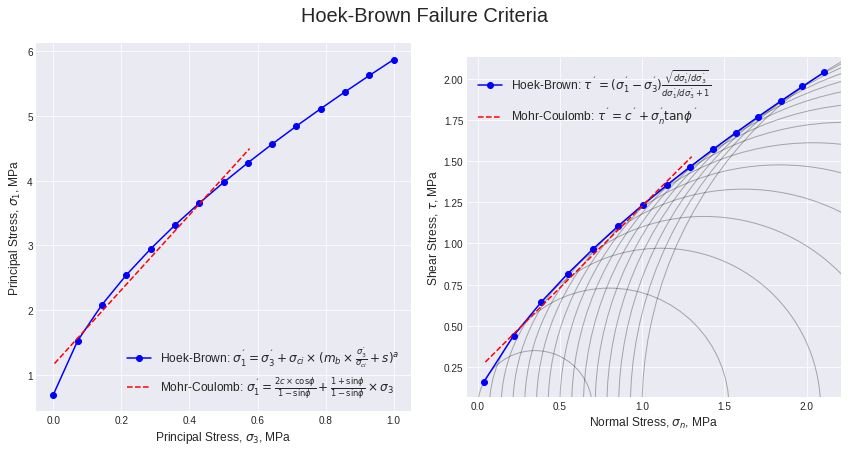

In [101]:
# Plot
plt.style.use('seaborn-dark')

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121)

sig1_formula_mohr = r'\sigma_1^{´}=\frac{2c \times \cos{\phi}}{1-\sin{\phi}}+\frac{1+\sin{\phi}}{1-\sin{\phi}} \times \sigma_3'

ax.plot(sig_array.sig3.values, sig_array.sig1.values, 'bo-', label='Hoek-Brown: ' + sig1_formula.join(r'$$')); 
ax.plot(sig_array_relat.sig3.values, sig1_mohr, 'r--', label='Mohr-Coulomb: ' + sig1_formula_mohr.join(r'$$'))
ax.set_xlabel(u'Principal Stress, $\sigma_3$, MPa', fontsize=12)
ax.set_ylabel(u'Principal Stress, $\sigma_1$, MPa', fontsize=12)

ax.grid(); ax.legend(fontsize='large')

ax = fig.add_subplot(122)

tau_formula_mohr = r'\tau^{´} = c^{´} + \sigma_n^{´}\tan{\phi}^{´}'

ax.plot(sig_array['sign'], sig_array['tau'],
        'bo-', label='Hoek-Brown: ' + tau_formula.join(r'$$'))
ax.plot(sig_array_relat['sign'], tau_mohr,
        'r--', label='Mohr-Coulomb: ' + tau_formula_mohr.join(r'$$'))
ax.set_xlabel(u'Normal Stress, $\sigma_n$, MPa', fontsize=12)
ax.set_ylabel(u'Shear Stress, $\u03C4$, MPa', fontsize=12)

centers = ((sig_array.sig1.values - sig_array.sig3.values) / 2) + sig_array.sig3.values
radius = sig_array.sig1.values - centers

for r, c in zip(radius, centers):
    ax.add_patch(plt.Circle([c, 0], r, facecolor='none', ec='k', alpha=.3))

ax.grid()
ax.set_aspect('equal')
ax.legend(fontsize='large')

fig.suptitle('Hoek-Brown Failure Criteria', fontsize=20, y=1.05)
fig.tight_layout(pad=1.5)
fig.savefig('./images/9/8.png', dpi=200)

<img src="./images/9/8.png" width="800">

### Results

We can, finally, get a summary of all parameters calculated during the analysis, but first let's calculate $\sigma_{tm}$ and $E_m$:

In [102]:
sigtm = 0.5*sigci*(mb-np.sqrt((mb**2)+4*s))

Em = (1 - (D/2)) * (np.sqrt(sigci/100.0)*10**((GSI-10)/40.0)) * 10**3

In [105]:
from IPython.display import display, Math

display(Math(r'\sigma_{ci} = %.2f MPa' % (sigci)))
display(Math(r'm_{i} = %.2f' % (mi)))
display(Math(r'GSI = %.2f' % (GSI)))
display(Math(r'\phi^{´} = %.2f °' % (phi)))
display(Math(r'c^{´} = %.2f MPa' % (coh)))
display(Math(r'\sigma_{cm} = %.2f MPa' % (sigcm)))
display(Math(r'\sigma_{tm} = %.2f MPa' % (sigtm)))
display(Math(r'E_m = %.2f MPa' % (Em)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>